**The project will be researching whether money can buy happiness by looking at country GDP per capita and country happiness scores. It will also examine if higher average happiness scores lead to a longer life expectancy.**

**Hypothesis Test 1:**

	Ho: The average happiness score for countries with a high GDP will not be significantly different from the average happiness score for countries with a low GDP
	Ha: The average happiness score for countries with a high GDP will be significantly different from the average happiness score for countries with a low GDP

**Hypothesis Test 2:**

	Ho: The average life expectancy for countries with a high happiness score will not be significantly different from the average life expectancy for countries with a low happiness score
	Ha: The average life expectancy for countries with a high happiness score will be significantly different from the average life expectancy for countries with a low happiness score



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [37]:
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import t
import math
import matplotlib.pyplot as plt

**Pulling in the Happiness 2018 Dataset and previewing the first five rows.**


In [4]:
df_happy = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Happiness 2018.csv')
df_happy.head()

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


**Pulling in the GDP Dataset and previewing the first five rows.**

In [5]:
df_gdp = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/GDP.csv')
df_gdp.head()

,Country,Country Code,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,24101.109430,25870.755940,26533.343900,27430.752400,28656.520210,28648.990020,28499.089430,30215.949230,30512.683910,30728.054500,33120.054180,32117.912320,30862.222690,31387.282960,34176.464600,35207.577240,36362.219320,37865.493490,38515.263800,34693.086750,33732.847450,35492.618490,35498.982090,37419.892820,38223.372260,38249.054870,38390.271650,39454.629830,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,839.485886,888.153370,885.840819,979.273979,1031.643135,1176.126357,1218.118215,1454.663015,1637.377987,1626.764793,1806.763930,1874.765634,1897.525938,1886.692977,1896.992520,1934.636754,1955.006208,NaN
2,Angola,AGO,3089.683369,3120.356148,2908.160798,2190.768160,2195.532289,2496.199493,2794.896906,2953.342709,3027.341795,3037.721175,3097.307292,3191.266323,3564.096026,3614.607278,3978.697194,4555.185842,5048.876449,5697.251328,6221.423373,6092.783245,6230.297028,6346.395122,6772.528333,6980.423038,7199.245478,7096.600615,6756.935074,6650.584940,6452.355165,NaN
3,Albania,ALB,2549.473022,1909.114038,1823.307673,2057.449657,2289.873135,2665.764906,2980.066288,2717.362124,3021.014738,3471.652592,3861.334172,4301.352799,4661.371553,4994.518807,5422.778462,5865.306196,6559.783257,7276.302969,8228.374239,8814.810856,9628.025783,10207.752350,10526.235450,10571.010650,11259.225890,11662.030480,11868.178970,12930.140030,13364.155400,NaN
4,Arab World,ARB,6808.206995,6872.273195,7255.328362,7458.647059,7645.682856,7774.207360,8094.149842,8397.515692,8797.662606,8938.451524,9415.632618,9584.108301,9581.797143,9974.641898,10937.316090,11646.486090,12442.187940,13041.925530,13739.727750,13640.846780,14127.778020,14518.827450,15423.465390,15824.780110,16153.244860,16501.792590,16935.383300,17099.889390,17570.137600,NaN


**Merging the Country and Score columns from the Happiness 2018 Dataset with the Country and 2018 columns from the GDP Dataset using Country as the shared column. Dropping the null values. Previewing the first five rows.**

In [6]:
df = df_happy[['Country', 'Score']].merge(df_gdp[['Country ', '2018']], how='left', left_on='Country', right_on='Country ')
df = df.dropna()
df.head()

,Country,Score,Country,2018
0,Finland,7.632,Finland,48416.93603
1,Norway,7.594,Norway,65510.58527
2,Denmark,7.555,Denmark,55671.16527
3,Iceland,7.495,Iceland,57303.06078
4,Switzerland,7.487,Switzerland,68060.94105


**Pulling in the Life Expectancy Dataset and previewing the first five rows.**

In [7]:
df_life = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Life Expectancy.csv')
df_life.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,68.784000,69.140000,69.498000,69.851000,70.191000,70.519000,70.833000,71.140000,71.441000,71.736000,72.023000,72.293000,72.538000,72.751000,72.929000,73.071000,73.181000,73.262000,73.325000,73.378000,73.425000,73.468000,73.509000,73.544000,73.573000,73.598000,73.622000,73.646000,73.671000,73.700000,73.738000,73.787000,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,46.352399,46.728797,47.102866,47.471168,47.829403,48.174999,48.503311,48.810837,49.097850,49.366328,49.619997,49.870693,50.115886,50.363456,50.610385,50.848335,51.058057,51.214281,51.299781,51.308595,51.251763,51.154113,51.048414,50.957262,50.890246,50.841865,50.808484,50.796157,50.820614,50.897607,51.044191,51.276129,51.606458,52.043149,52.585853,53.228913,53.966550,54.791707,55.682344,56.609799,57.548772,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005197,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.403000,36.900000,37.409000,37.930000,38.461000,39.003000,39.558000,40.128000,40.715000,41.320000,41.944000,42.585000,43.244000,43.923000,44.617000,45.324000,46.040000,46.761000,47.486000,48.211000,48.930000,49.640000,50.331000,50.999000,51.641000,52.256000,52.842000,53.398000,53.924000,54.424000,54.906000,55.376000,55.841000,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.484000,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,39.662762,40.066408,40.482832,40.914215,41.365117,41.837214,42.327043,42.829077,43.339219,43.855042,44.373966,44.892226,45.402681,45.897475,46.366104,46.798292,47.188618,47.533985,47.830536,48.079381,48.284581,48.454128,48.597421,48.719231,48.816999,48.885934,48.923416,48.933708,48.925505,48.909937,48.899875,48.909130,48.955339,49.052639,49.219714,49.475136,49.816929,50.239432,50.733417,51.283487,51.868203,52.463958,53.049500,53.612090,54.144307,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.178000,40.546000,40.914000,41.282000,41.650000,42.016000,42.374000,42.721000,43.053000,43.367000,43.660000,43.931000,44.178000,44.404000,44.611000,44.799000,44.966000,45.107000,45.213000,45.283000,45.317000,45.324000,45.306000,45.271000,45.230000,45.201000,45.201000,45.246000,45.350000,45.519000,45.763000,46.093000,46.522000,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.311000,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,NaN


**Creating a final dataset by merging the previously merged four column dataset with the Country Name and 2018 columns from the Life Expectancy dataset. Renaming the two columns that were both pulled in as 2018 to 2018 GDP and 2018 Life Expectancy. Previewing the first five rows.**

In [8]:
df_final = df.merge(df_life[['Country Name', '2018']], how='left', left_on='Country', right_on='Country Name')
df_final = df_final.rename(columns = {'2018_x': '2018 GDP', '2018_y': '2018 Life Expectancy'})
df_final.head()

,Country,Score,Country,2018 GDP,Country Name,2018 Life Expectancy
0,Finland,7.632,Finland,48416.93603,Finland,81.734146
1,Norway,7.594,Norway,65510.58527,Norway,82.758537
2,Denmark,7.555,Denmark,55671.16527,Denmark,80.953659
3,Iceland,7.495,Iceland,57303.06078,Iceland,82.860976
4,Switzerland,7.487,Switzerland,68060.94105,Switzerland,83.753659


**Running the Pearson R test on the 2018 GDP and Score columns. The Pearson R test (or Pearson's Correlation Coefficient) measures the statistical significance between two variables. The first value is the correlation coefficient. This is a number between 0 and 1 with 0 meaning there is no relationship between the two variables and 1 meaning there is an exact linear relationship. The second number is the 2-tailed p-value which, when compared to the alpha, will determine if the null hypothesis can be rejected.**

**In this case, the correlation coefficient of 0.7145 shows a statistically significant relationship between GDP and Happiness Score. The p-value being such an extremely small number (and far less than the alpha of 0.05) signals that the null hypothesis can be rejected.**

In [9]:
stats.pearsonr(df_final['2018 GDP'], df_final['Score'])

(0.7144914240113475, 6.0832277619159196e-24)

**Running the Pearson R test on the Score and 2018 Life Expectancy columns.**

**In this case the relationship between Happiness Score and Life Expectancy is even stronger than the previous relationship between GDP and Happiness Score. The p-value is an extremely small number again, indicating that the null hypothesis can be rejected here as well.**

In [10]:
stats.pearsonr(df_final['Score'], df_final['2018 Life Expectancy'])

(0.7906563892000872, 2.854910913201112e-32)

**Bucketing the values in the GDP column in order to run an independent samples t-test. The buckets wil be a GDP less than or equal to 15,000 and greater than 15,000. Running the describe function on each to get a quick sense of the count, mean, etc.**

In [11]:
low_gdp = df_final.iloc[(df_final['2018 GDP'] <= 15000).values]
low_gdp.describe()

,Score,2018 GDP,2018 Life Expectancy
count,73.000000,73.000000,73.000000
mean,4.648959,6327.876614,67.754529
std,0.809514,4276.027848,6.584889
min,2.905000,744.182072,52.805000
25%,4.161000,2424.755845,63.510000
50%,4.471000,5138.752457,67.665000
75%,5.161000,9326.664059,73.096000
max,6.382000,14623.674050,78.875000


In [12]:
high_gdp = df_final.iloc[(df_final['2018 GDP'] > 15000).values]
high_gdp.describe()

,Score,2018 GDP,2018 Life Expectancy
count,72.000000,72.000000,72.000000
mean,6.193528,39625.694106,78.203584
std,0.823224,22925.919346,4.113420
min,3.590000,15012.930270,66.187000
25%,5.606500,20745.619793,75.603500
50%,6.182500,33575.919420,77.942366
75%,6.832000,51471.840028,81.793902
max,7.632000,126898.425900,84.934146


**Plotting a histogram for the low_gdp happiness scores.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7be2fd3850>]],
      dtype=object)

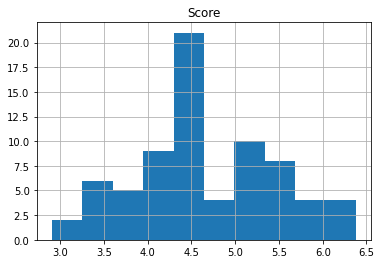

In [35]:
low_gdp.hist(column='Score')

**Plotting a histogram for the high_gdp happiness scores.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7be2ea99d0>]],
      dtype=object)

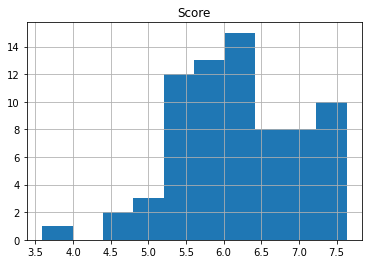

In [36]:
high_gdp.hist(column='Score')

**Running the independent samples t-test on the low and high score samples. The t-statistic will be compared against the critical value which will be calculated below. If the absolute value of the t-statistic is less than or equal to the critical value, we will accept the null hypothesis that average happiness scores are the same for low and high GDP countries. If the absolute value of the t-statistic is greater than the critical value, we will reject the null hypothesis. The p-value can also be used to determine if the null hypothesis can be rejected. If the p-value is greater than the alpha value (defined below), we will accept the null hypothesis. If it is less than or equal to the alpha, we will reject the null hypothesis.**

In [40]:
stats.ttest_ind(low_gdp['Score'], high_gdp['Score'])

Ttest_indResult(statistic=-11.391334622199292, pvalue=8.501825942866644e-22)

**Calculating the critical value, standard error, mean difference, margin of error, and confidence intervals. In order to do so, we first need the count, mean, and variance for each sample.**

In [14]:
sample_1a_n = low_gdp.shape[0]
sample_2a_n = high_gdp.shape[0]
sample_1a_mean = low_gdp['Score'].mean()
sample_2a_mean = high_gdp['Score'].mean()
sample_1a_var = low_gdp['Score'].var()
sample_2a_var = high_gdp['Score'].var()

In [44]:
degrees_freedom = sample_1a_n + sample_2a_n - 2
alpha = .025
critical_value_a = t.ppf(1-alpha, degrees_freedom)
print('The critical value is equal to ' + str(critical_value))

The critical value is equal to 1.976692197917468


In [15]:
std_err_diff_a = math.sqrt((sample_1a_var / sample_1a_n) + (sample_2a_var / sample_2a_n))

In [16]:
mean_difference_a = sample_2a_mean - sample_1a_mean

In [45]:
margin_of_err_a = critical_value_a * std_err_diff_a
ci_lower_a = mean_difference_a - margin_of_err_a
ci_upper_a = mean_difference_a + margin_of_err_a

print("The difference in means at the 95% confidence interval is between "+str(ci_lower_a) + " and "+str(ci_upper_a)+".")

The difference in means at the 95% confidence interval is between 1.2765148285801982 and 1.8126229187561804.


**Plotting the means and confidence intervals of the two samples. We can see that the two confidence interval bars do not intersect, another indicator that the null hypothesis can be rejected.**

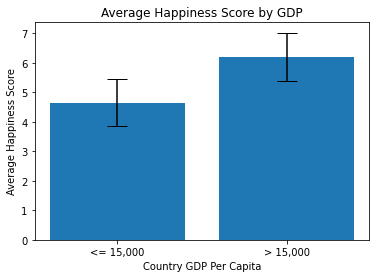

In [18]:
plt.bar(['<= 15,000', '> 15,000'], [sample_1a_mean, sample_2a_mean], yerr=[math.sqrt(sample_1a_var), math.sqrt(sample_2a_var)], capsize=10)
plt.xlabel('Country GDP Per Capita')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score by GDP')
plt.show()

**Plotting a scatterplot to view the relationship between GDP and Happiness Score.**

**We can see that there is a strong linear relationship at first, proving that when starting at extremely low levels of income, incremental increases in income do lead to increased happiness. There comes a point, however, where that relationship flattens out. This indicates that once you hit a GDP around 50,000, increases in GDP from that point do not significantly increase happiness scores.**

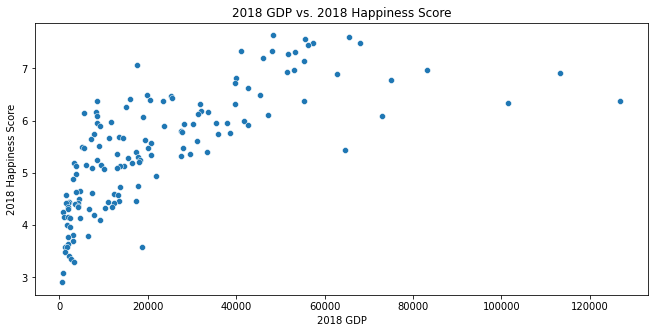

In [19]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='2018 GDP', y='Score', data=df_final)
plt.ylabel('2018 Happiness Score')
plt.title('2018 GDP vs. 2018 Happiness Score')
plt.show()

**Bucketing the values in the Score column in order to run an independent samples t-test. The buckets wil be a score less than 5 and greater than or equal to 5. Running the describe function on each to get a quick sense of the count, mean, etc.**

In [20]:
low_score = df_final.iloc[(df_final['Score'] < 5).values]
low_score.describe()

,Score,2018 GDP,2018 Life Expectancy
count,51.000000,51.000000,51.000000
mean,4.172902,5871.485895,65.440649
std,0.485456,5446.361396,5.931422
min,2.905000,744.182072,52.805000
25%,3.801500,1976.571284,61.358500
50%,4.321000,3467.556478,64.704000
75%,4.463500,8506.171953,69.345500
max,4.975000,21960.369940,78.458000


In [21]:
high_score = df_final.iloc[(df_final['Score'] >= 5).values]
high_score.describe()

,Score,2018 GDP,2018 Life Expectancy
count,94.000000,94.000000,94.000000
mean,6.090319,32080.204126,77.013463
std,0.721711,24236.874575,4.745009
min,5.082000,3449.779316,54.332000
25%,5.483000,13954.446305,74.298250
50%,5.964500,27583.953135,76.785000
75%,6.485000,44706.161435,81.307317
max,7.632000,126898.425900,84.934146


**Plotting a historgram for low_score 2018 Life Expectancy.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7be2e460d0>]],
      dtype=object)

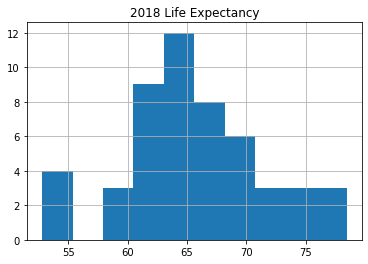

In [42]:
low_score.hist(column='2018 Life Expectancy')

**Plotting a histogram for high_score 2018 Life Expectancy.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7be2e00050>]],
      dtype=object)

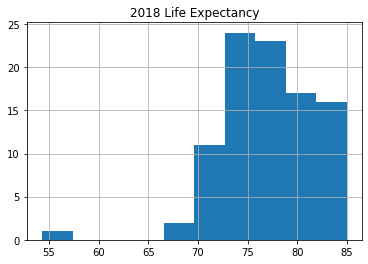

In [43]:
high_score.hist(column='2018 Life Expectancy')

**Running the independent samples t-test on the low and high score samples. The t-statistic will be compared against the critical value which will be calculated below. If the absolute value of the t-statistic is less than or equal to the critical value, we will accept the null hypothesis that average happiness scores are the same for low and high GDP countries. If the absolute value of the t-statistic is greater than the critical value, we will reject the null hypothesis. The p-value can also be used to determine if the null hypothesis can be rejected. If the p-value is greater than the alpha value (defined below), we will accept the null hypothesis. If it is less than or equal to the alpha, we will reject the null hypothesis.**

In [22]:
stats.ttest_ind(low_score['2018 Life Expectancy'], high_score['2018 Life Expectancy'])

Ttest_indResult(statistic=-12.819552800277167, pvalue=1.5796065406900053e-25)

**Calculating the critical value, standard error, mean difference, margin of error, and confidence intervals. In order to do so, we first need the count, mean, and variance for each sample.**

In [23]:
sample_1b_n = low_score.shape[0]
sample_2b_n = high_score.shape[0]
sample_1b_mean = low_score['2018 Life Expectancy'].mean()
sample_2b_mean = high_score['2018 Life Expectancy'].mean()
sample_1b_var = low_score['2018 Life Expectancy'].var()
sample_2b_var = high_score['2018 Life Expectancy'].var()

In [48]:
degrees_freedom = sample_1b_n + sample_2b_n - 2
alpha = .025
critical_value_b = t.ppf(1-alpha, degrees_freedom)
print('The critical value is equal to ' + str(critical_value))

The critical value is equal to 1.976692197917468


In [24]:
std_err_diff_b = math.sqrt((sample_1b_var / sample_1b_n) + (sample_2b_var / sample_2b_n))

In [25]:
mean_difference_b = sample_2b_mean - sample_1b_mean

In [49]:
margin_of_err_b = critical_value_b * std_err_diff_b
ci_lower_b = mean_difference_b - margin_of_err_b
ci_upper_b = mean_difference_b + margin_of_err_b

print("The difference in means at the 95% confidence interval is between "+str(ci_lower_b) + " and "+str(ci_upper_b)+".")

The difference in means at the 95% confidence interval is between 9.667216059959095 and 13.478411788213656.


**Plotting the means and confidence intervals of the two samples. We can see that the two confidence interval bars do not intersect, another indicator that the null hypothesis can be rejected.**

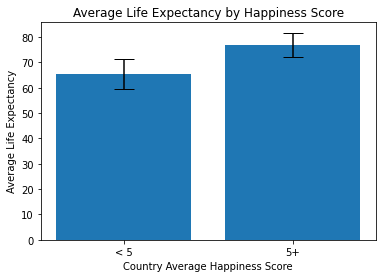

In [27]:
plt.bar(['< 5', '5+'], [sample_1b_mean, sample_2b_mean], yerr=[math.sqrt(sample_1b_var), math.sqrt(sample_2b_var)], capsize=10)
plt.xlabel('Country Average Happiness Score')
plt.ylabel('Average Life Expectancy')
plt.title('Average Life Expectancy by Happiness Score')
plt.show()

**Plotting a scatterplot to view the relationship between Happiness Score and Life Expectancy.**

**We can see that there seems to be a strong linear relationship between happiness scores and life expectancy indicating that as happiness scores increase, life expectancy also increases.**

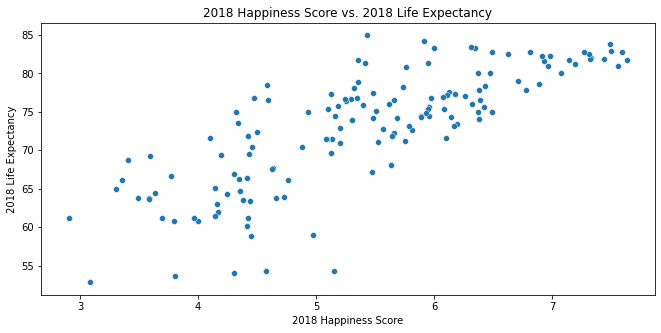

In [28]:
plt.figure(figsize=(11,5))
sns.scatterplot(x='Score', y='2018 Life Expectancy', data=df_final)
plt.xlabel('2018 Happiness Score')
plt.title('2018 Happiness Score vs. 2018 Life Expectancy')
plt.show()

**Based on the results of the above two hypothesis tests, it is recommended that individuals evaluate the GDP per capita of the country in which they live relative to the rest of the world and consider moving to a country with a higher GDP per capita. As evidenced by the shape of the 2018 GDP vs. 2018 Happiness Score scatterplot, the move only needs to be made to a country with a GDP per capital greater than or equal to 50,000. The scatterplot shows a strong linear relationship between GDP per capita and Happiness Score as GDP increases up to 50,000, but the relationship flattens considerably as GDP increases after the 50,000 mark.**